In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import PIL
import math

In [2]:
maydanoz = mpimg.imread('yüz.jpg') / 255.0
maydanoz.shape
maydanoz_red = maydanoz[:1000, :1000, 0]
maydanoz_green = maydanoz[:1001, :1001, 1]
maydanoz_blue = maydanoz[:1001, :1001, 2]

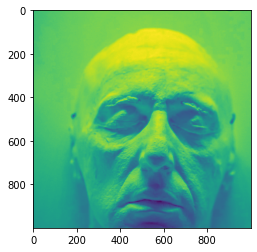

In [3]:
plt.imshow(maydanoz_red)

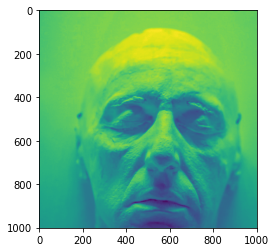

In [4]:
plt.imshow(maydanoz_blue)

In [5]:
horizontal_sobel = np.array([-1, -2, -1, 0, 0, 0, 1, 2, 1]).reshape(3, 3)
vertical_sobel = np.array([-1, 0, 1, -2, 0, 2, -1, 0, 1]).reshape(3, 3)
vertical_sobel2 = np.array([1, 0, -1, 2, 0, -2, 1, 0, -1]).reshape(3, 3)
horizontal_sobel2 = np.array([-1, -2, -1, 0, 0, 0, 1, 2, 1]).reshape(3, 3)

In [6]:
print(horizontal_sobel*vertical_sobel)

[[ 1  0 -1]
 [ 0  0  0]
 [-1  0  1]]


In [7]:
def edge_extraction_sobel(image, detector):
    convolution_matrix = np.zeros(((image.shape[0] // detector.shape[0]), 
                                   (image.shape[1] // detector.shape[0])))
        
    for i in range(0, convolution_matrix.shape[0]):
        for d in range(0, convolution_matrix.shape[1]):
            convolution = (image[0+3*i:3+3*i, 0+3*d:3+3*d] * detector).sum()
            convolution_matrix[i, d] += convolution
            
    return convolution_matrix

In [8]:
red_extracted0 = edge_extraction_sobel(maydanoz_red, horizontal_sobel)
red_extracted1 = edge_extraction_sobel(maydanoz_red, vertical_sobel)
red_extracted1_1 = (red_extracted0 ** 2 + red_extracted1 ** 2) ** (1/2)
red_extracted2 = edge_extraction_sobel(red_extracted0, horizontal_sobel)
red_extracted3 = edge_extraction_sobel(red_extracted1, vertical_sobel)
red_extracted1_2 = (red_extracted2 ** 2 + red_extracted3 ** 2) ** (1/2)

In [9]:
green_extracted0 = edge_extraction_sobel(maydanoz_green, horizontal_sobel)
green_extracted1 = edge_extraction_sobel(maydanoz_green, vertical_sobel)
green_extracted2 = edge_extraction_sobel(green_extracted0, horizontal_sobel)
green_extracted3 = edge_extraction_sobel(green_extracted1, vertical_sobel)
green_extracted1_1 = (green_extracted0 ** 2 + green_extracted1 ** 2) ** (1/2)
green_extracted1_2 = (green_extracted2 ** 2 + green_extracted3 ** 2) ** (1/2)

In [10]:
blue_extracted0 = edge_extraction_sobel(maydanoz_blue, horizontal_sobel)
blue_extracted1 = edge_extraction_sobel(maydanoz_blue, vertical_sobel)
blue_extracted2 = edge_extraction_sobel(blue_extracted0, vertical_sobel)
blue_extracted3 = edge_extraction_sobel(blue_extracted1, vertical_sobel)
blue_extracted1_1 = (blue_extracted0 ** 2 + blue_extracted1 ** 2) ** (1/2)
blue_extracted1_2 = (blue_extracted2 ** 2 + blue_extracted3 ** 2) ** (1/2)

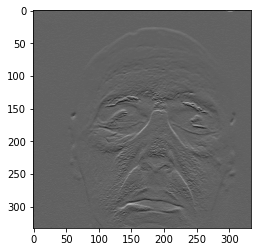

In [37]:
rgb = (blue_extracted1_1**3 + red_extracted1_1**3 + green_extracted1_1**3)**(1/3)

plt.imshow(green_extracted0, cmap='gray')

In [12]:
def edge_detection_sobel(image, horizontal, vertical):
    convolution_matrix = np.zeros(((image.shape[0]), 
                                   (image.shape[1])))
        
    for i in range(0, image.shape[0]-3):
        for j in range(0, image.shape[1]-3):
            convolution_vertical = image[0+i:3+i, 0+j:3+j] * vertical
            convolution_horizontal = image[0+i:3+i, 0+j:3+j] * horizontal
            convolution_matrix[i, j] += convolution_vertical.sum() / 8
            convolution_matrix[i, j] += convolution_horizontal.sum() / 8
            
    return (convolution_matrix)

In [13]:
redge_detection0 = edge_detection_sobel(red_extracted0, horizontal_sobel, vertical_sobel)
redge_detection1 = edge_detection_sobel(red_extracted1, horizontal_sobel, vertical_sobel)
redge_detection2 = edge_detection_sobel(red_extracted2, horizontal_sobel, vertical_sobel)
redge_detection3 = edge_detection_sobel(red_extracted3, horizontal_sobel, vertical_sobel)
edge_detection_try = edge_detection_sobel(maydanoz_blue, horizontal_sobel, vertical_sobel)
redge_detection1_1 = edge_detection_sobel(red_extracted1_1, horizontal_sobel, vertical_sobel)
redge_detection1_2 = edge_detection_sobel(red_extracted1_2, horizontal_sobel, vertical_sobel)

In [14]:
green_detection0 = edge_detection_sobel(green_extracted0, horizontal_sobel, vertical_sobel)
green_detection1 = edge_detection_sobel(green_extracted1, horizontal_sobel, vertical_sobel)
green_detection2 = edge_detection_sobel(green_extracted2, horizontal_sobel, vertical_sobel)
green_detection3 = edge_detection_sobel(green_extracted3, horizontal_sobel, vertical_sobel)
green_detection1_1 = edge_detection_sobel(green_extracted1_1, horizontal_sobel, vertical_sobel)
green_detection1_2 = edge_detection_sobel(green_extracted1_2, horizontal_sobel, vertical_sobel)

In [15]:
blue_detection0 = edge_detection_sobel(blue_extracted0, horizontal_sobel, vertical_sobel)
blue_detection1 = edge_detection_sobel(blue_extracted1, horizontal_sobel, vertical_sobel)
blue_detection2 = edge_detection_sobel(blue_extracted2, horizontal_sobel, vertical_sobel)
blue_detection3 = edge_detection_sobel(blue_extracted3, horizontal_sobel, vertical_sobel)
blue_detection1_1 = edge_detection_sobel(blue_extracted1_1, horizontal_sobel, vertical_sobel)
blue_detection1_2 = edge_detection_sobel(blue_extracted1_2, horizontal_sobel, vertical_sobel)

In [16]:
rgb_detection1_1 = blue_detection1_1 + redge_detection1_1 + green_detection1_1
rgb_detection1_2 = blue_detection1_2 + redge_detection1_2 + green_detection1_2

AxesImage(54,36;334.8x217.44)


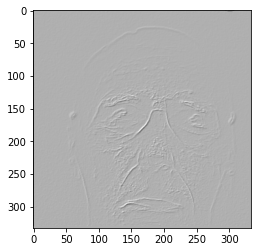

In [17]:
print(plt.imshow(rgb_detection1_1, cmap='gray'))

AxesImage(54,36;334.8x217.44)


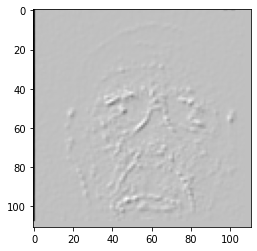

In [18]:
print(plt.imshow(rgb_detection1_2, cmap='gray'))

In [19]:
def gradients_direction(image):
    gradients_matrix = np.zeros(((image.shape[0]), 
                                   (image.shape[1])))
    
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            gradient_vertical = image[i, j] - image[i, j-1]
            gradient_horizontal = image[i, j] - image[i-1, j]
            if bool(gradient_horizontal > 0 and gradient_vertical > 0) == True:
                gradients_matrix[i, j] += math.atan(gradient_vertical / gradient_horizontal)
            else:
                continue
    return gradients_matrix

In [20]:
gradients_r1 = gradients_direction(redge_detection1_1)
gradients_r2 = gradients_direction(redge_detection1_2)
gradients_g1 = gradients_direction(green_detection1_1)
gradients_g2 = gradients_direction(green_detection1_2)
gradients_b1 = gradients_direction(blue_detection1_1)
gradients_b2 = gradients_direction(blue_detection1_2)
gradients_image = gradients_direction(maydanoz_green)

AxesImage(54,36;334.8x217.44)


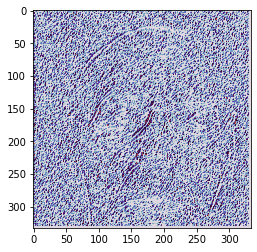

In [21]:
print(plt.imshow(gradients_r1, cmap='twilight'))

AxesImage(54,36;334.8x217.44)


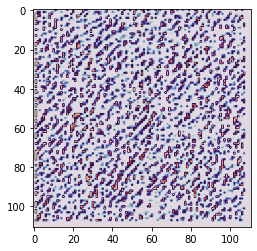

In [22]:
print(plt.imshow(gradients_r2, cmap='twilight'))

AxesImage(54,36;334.8x217.44)


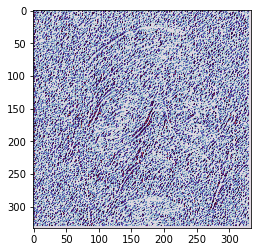

In [23]:
print(plt.imshow(gradients_b1, cmap='twilight'))

AxesImage(54,36;334.8x217.44)


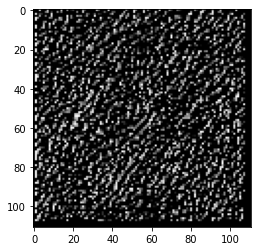

In [24]:
print(plt.imshow(gradients_g2, cmap='gray'))

In [38]:
noise = np.random.rand(333, 333)
noise_image = noise + green_extracted1_1

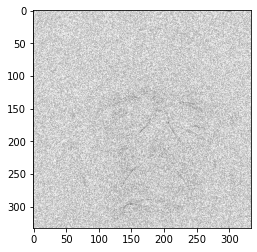

In [41]:
plt.imshow(noise_image, cmap='gray_r')

In [27]:
def deconvolution(style, content):
    deconvolution_matrix = np.zeros((style.shape[0], style.shape[1]))
        
    for i in range(0, content.shape[0]):
        for d in range(0, content.shape[1]):
            deconvolution_operator = style[0+3*i:3+3*i, 0+3*d:3+3*d]
            content_info = content[i, d]
            deconvolution_matrix[0+3*i:3+3*i, 0+3*d:3+3*d] += content_info * deconvolution_operator
            
    return deconvolution_matrix

In [28]:
deconvolution_1 = deconvolution(gradients_r1, noise_image)

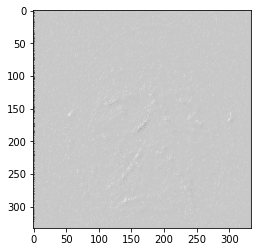

In [29]:
plt.imshow(deconvolution_1, cmap='gray')